# Applications

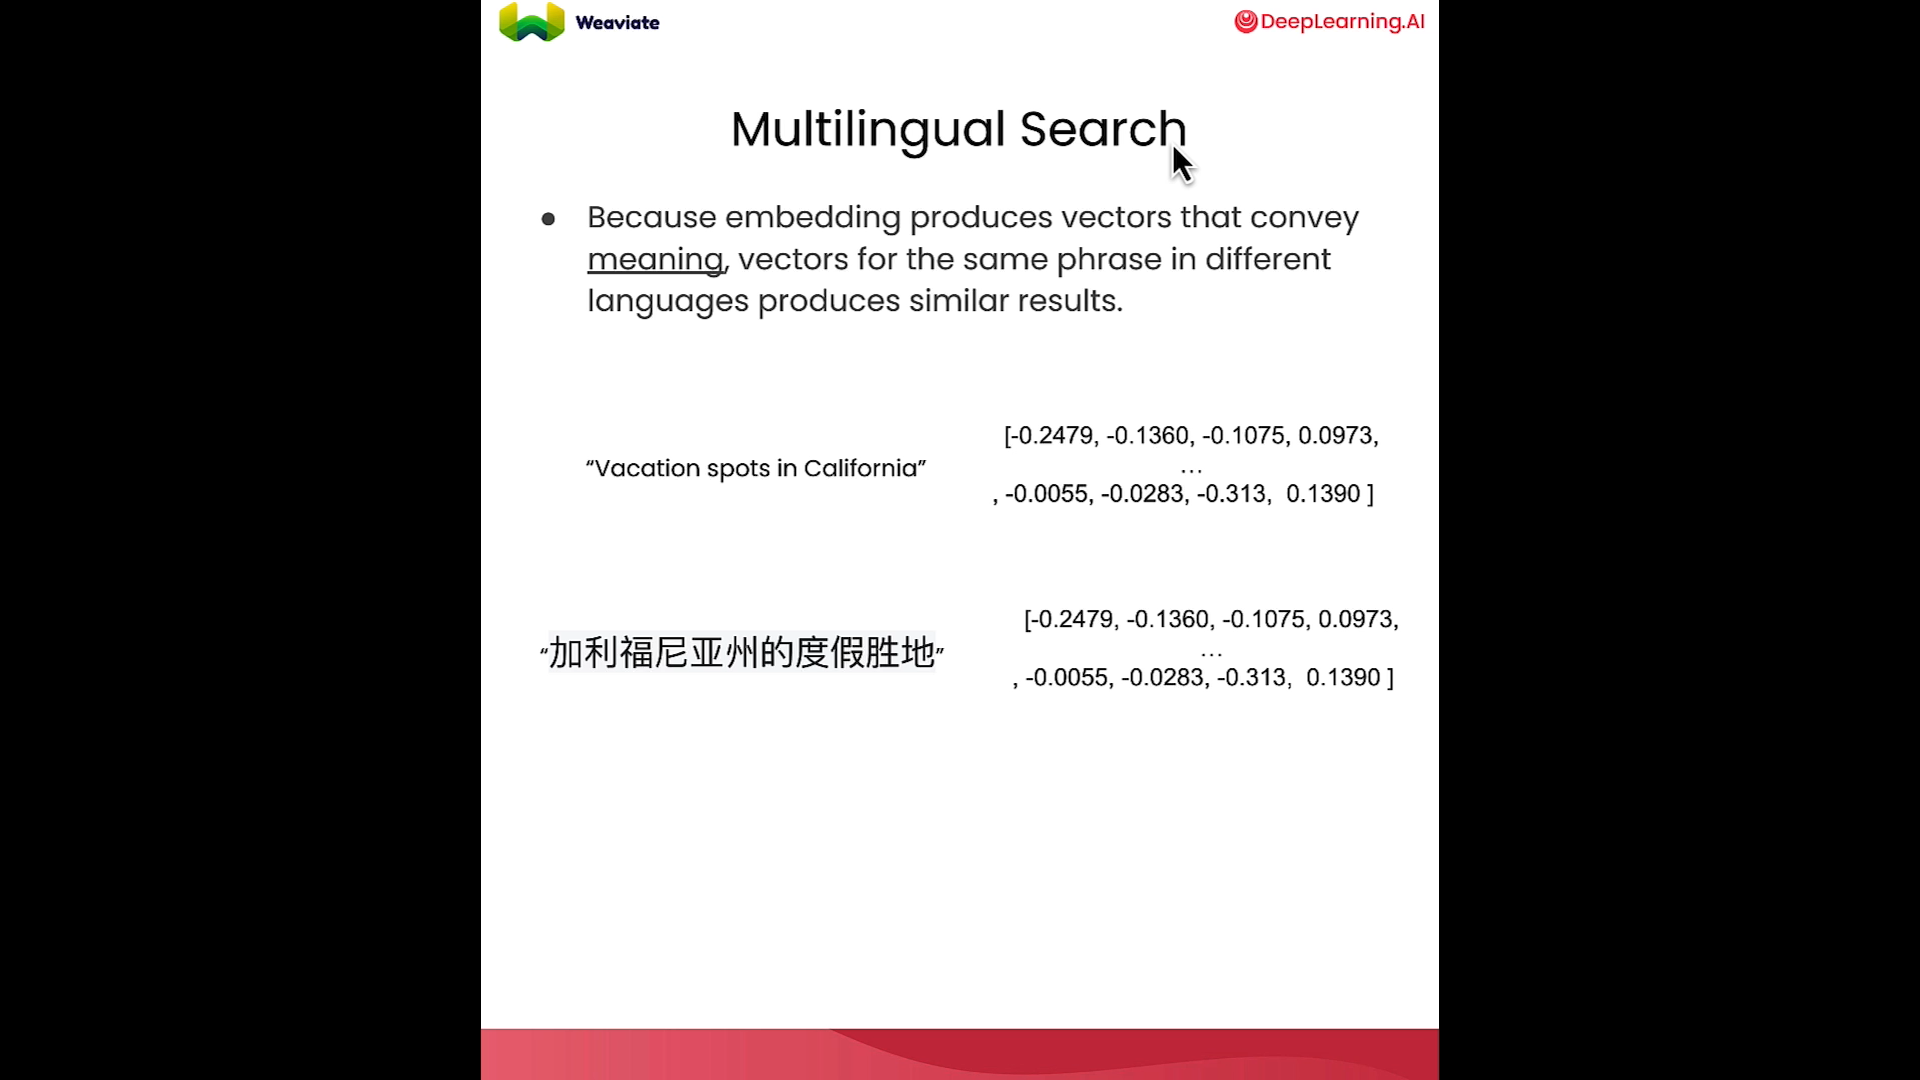

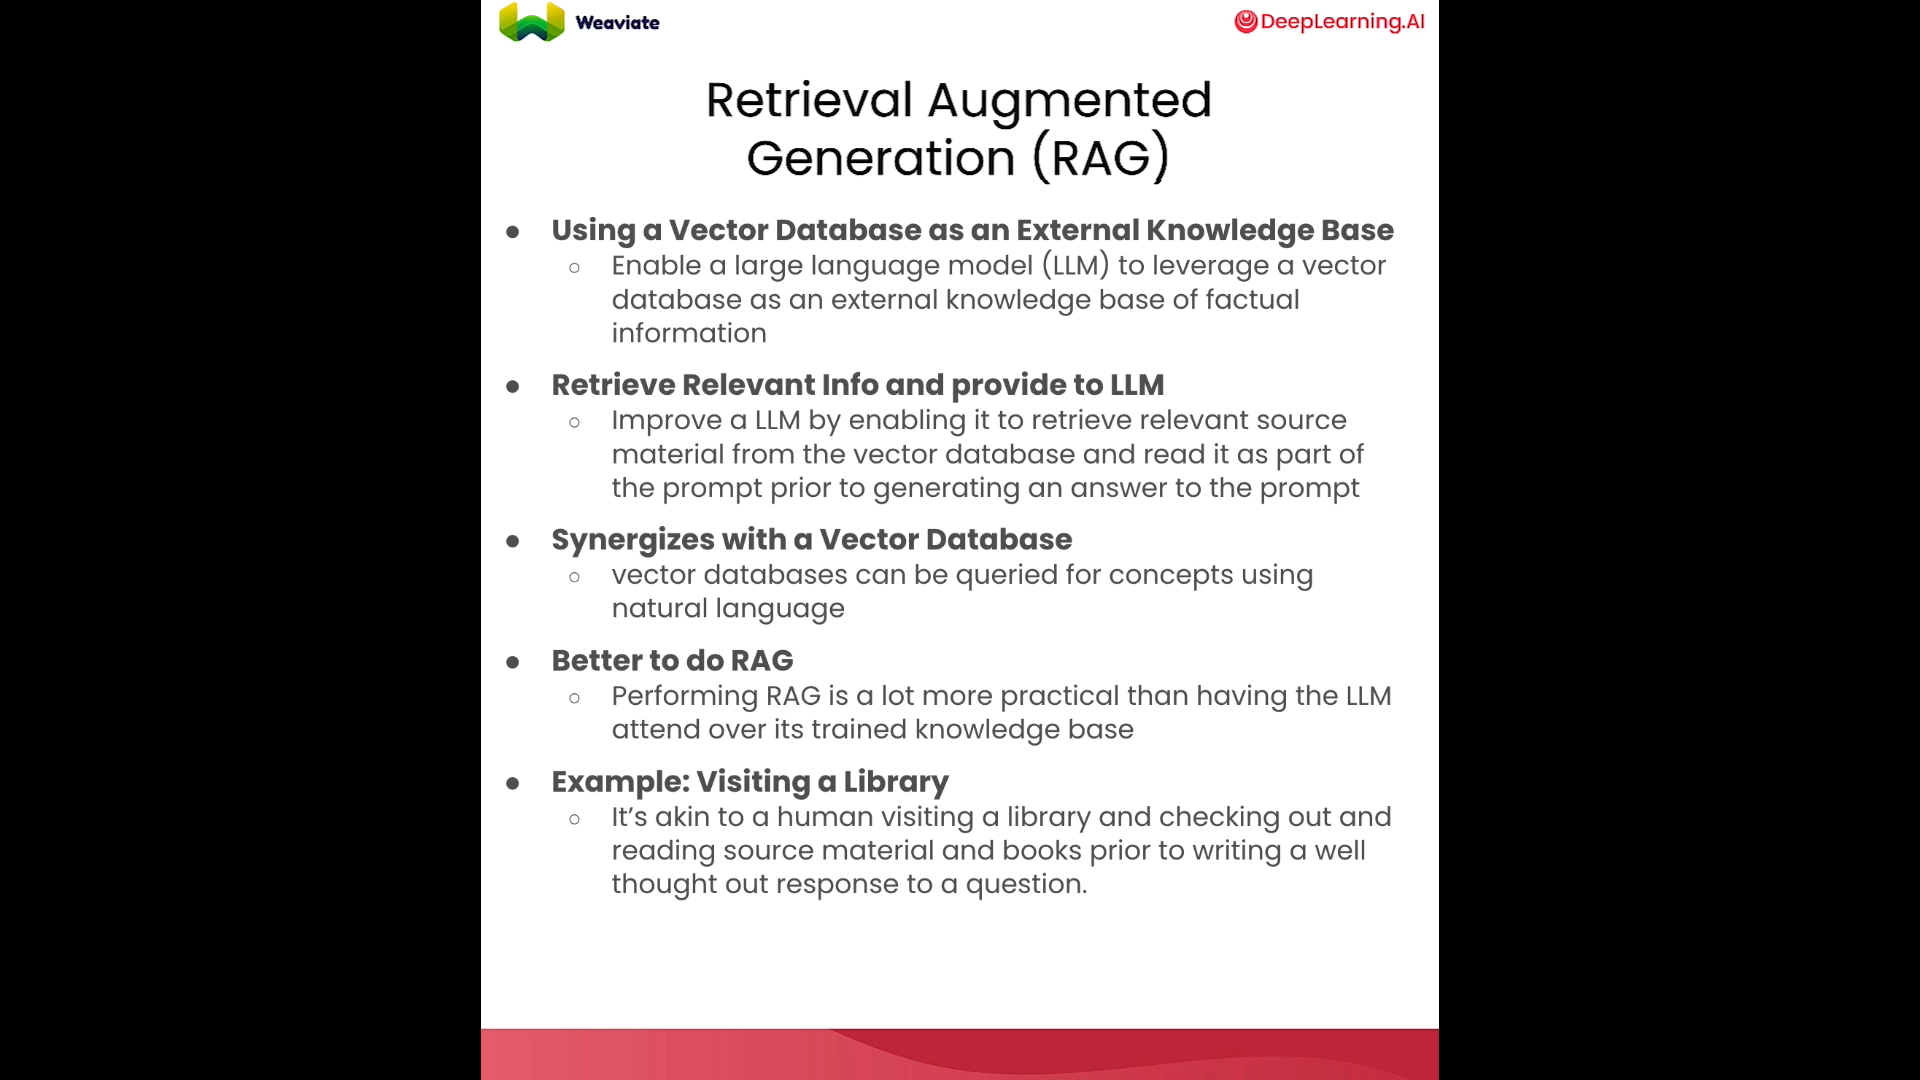

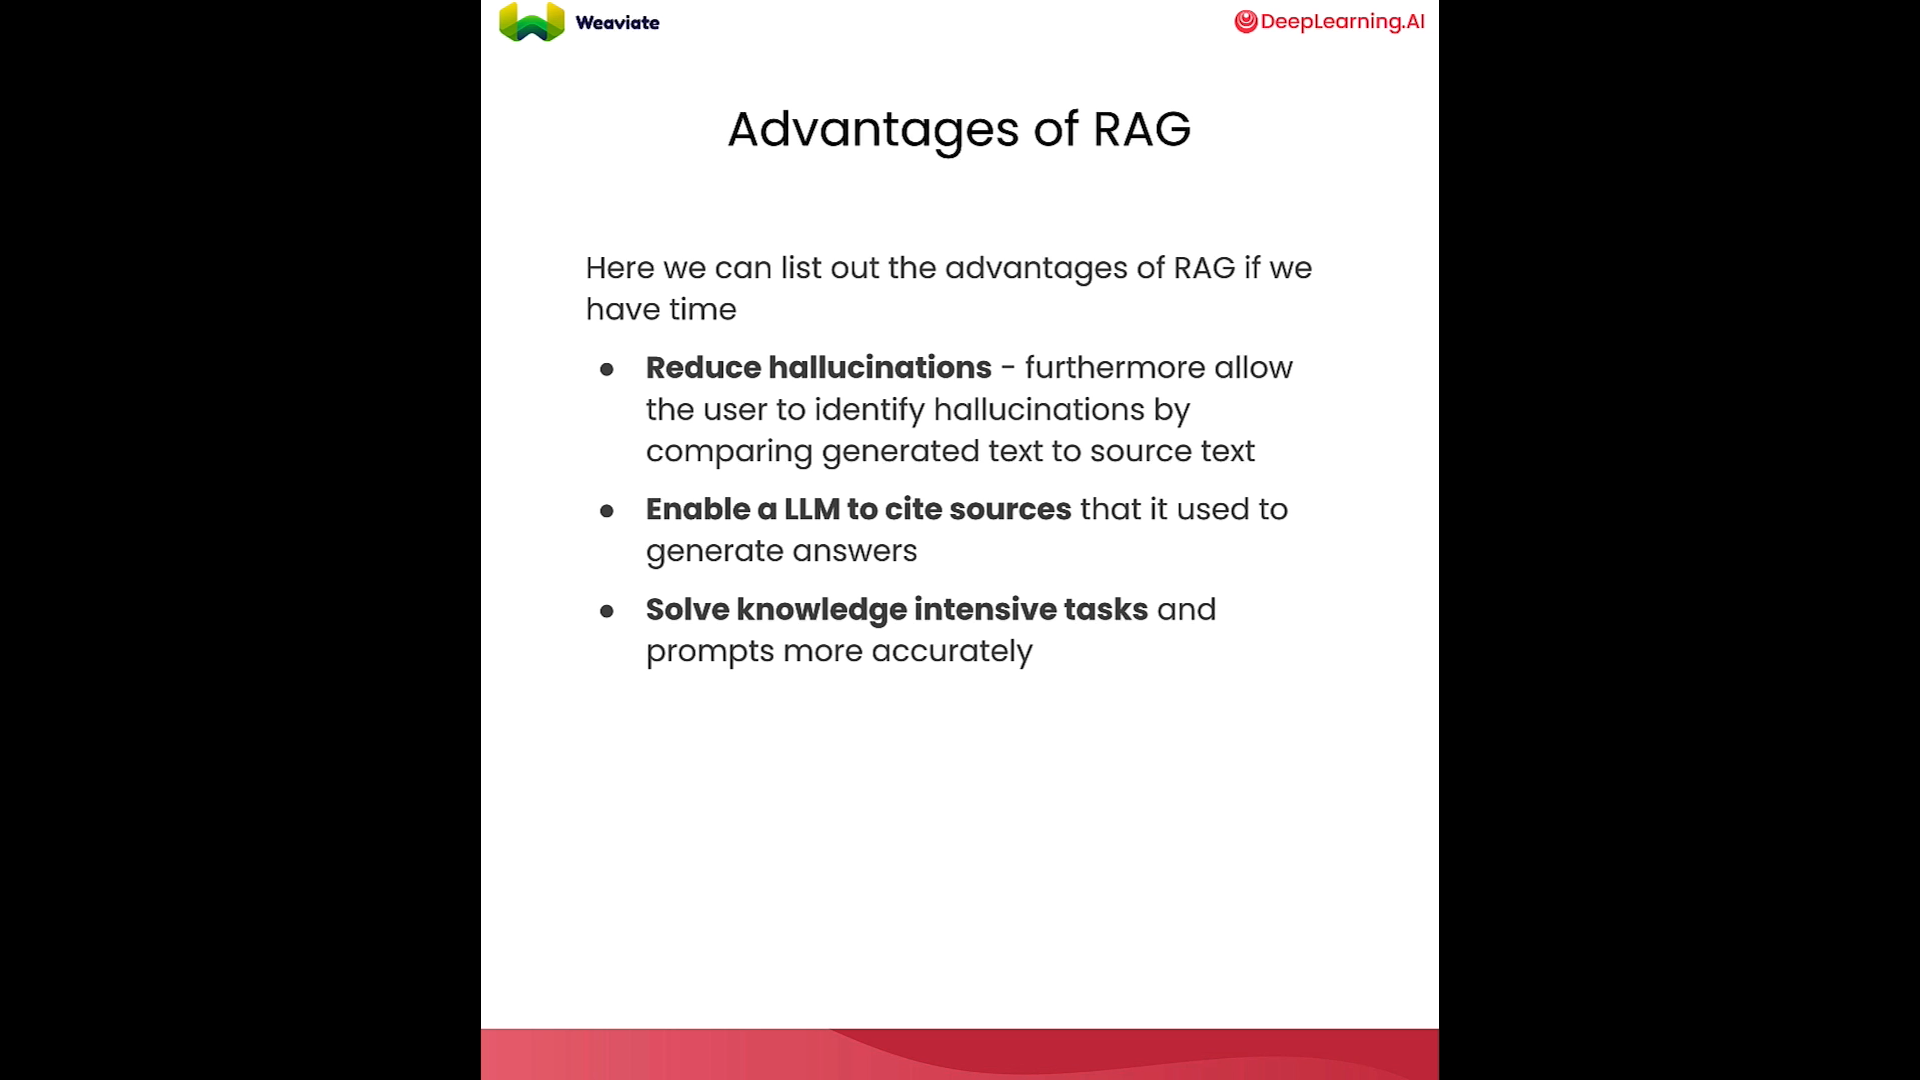

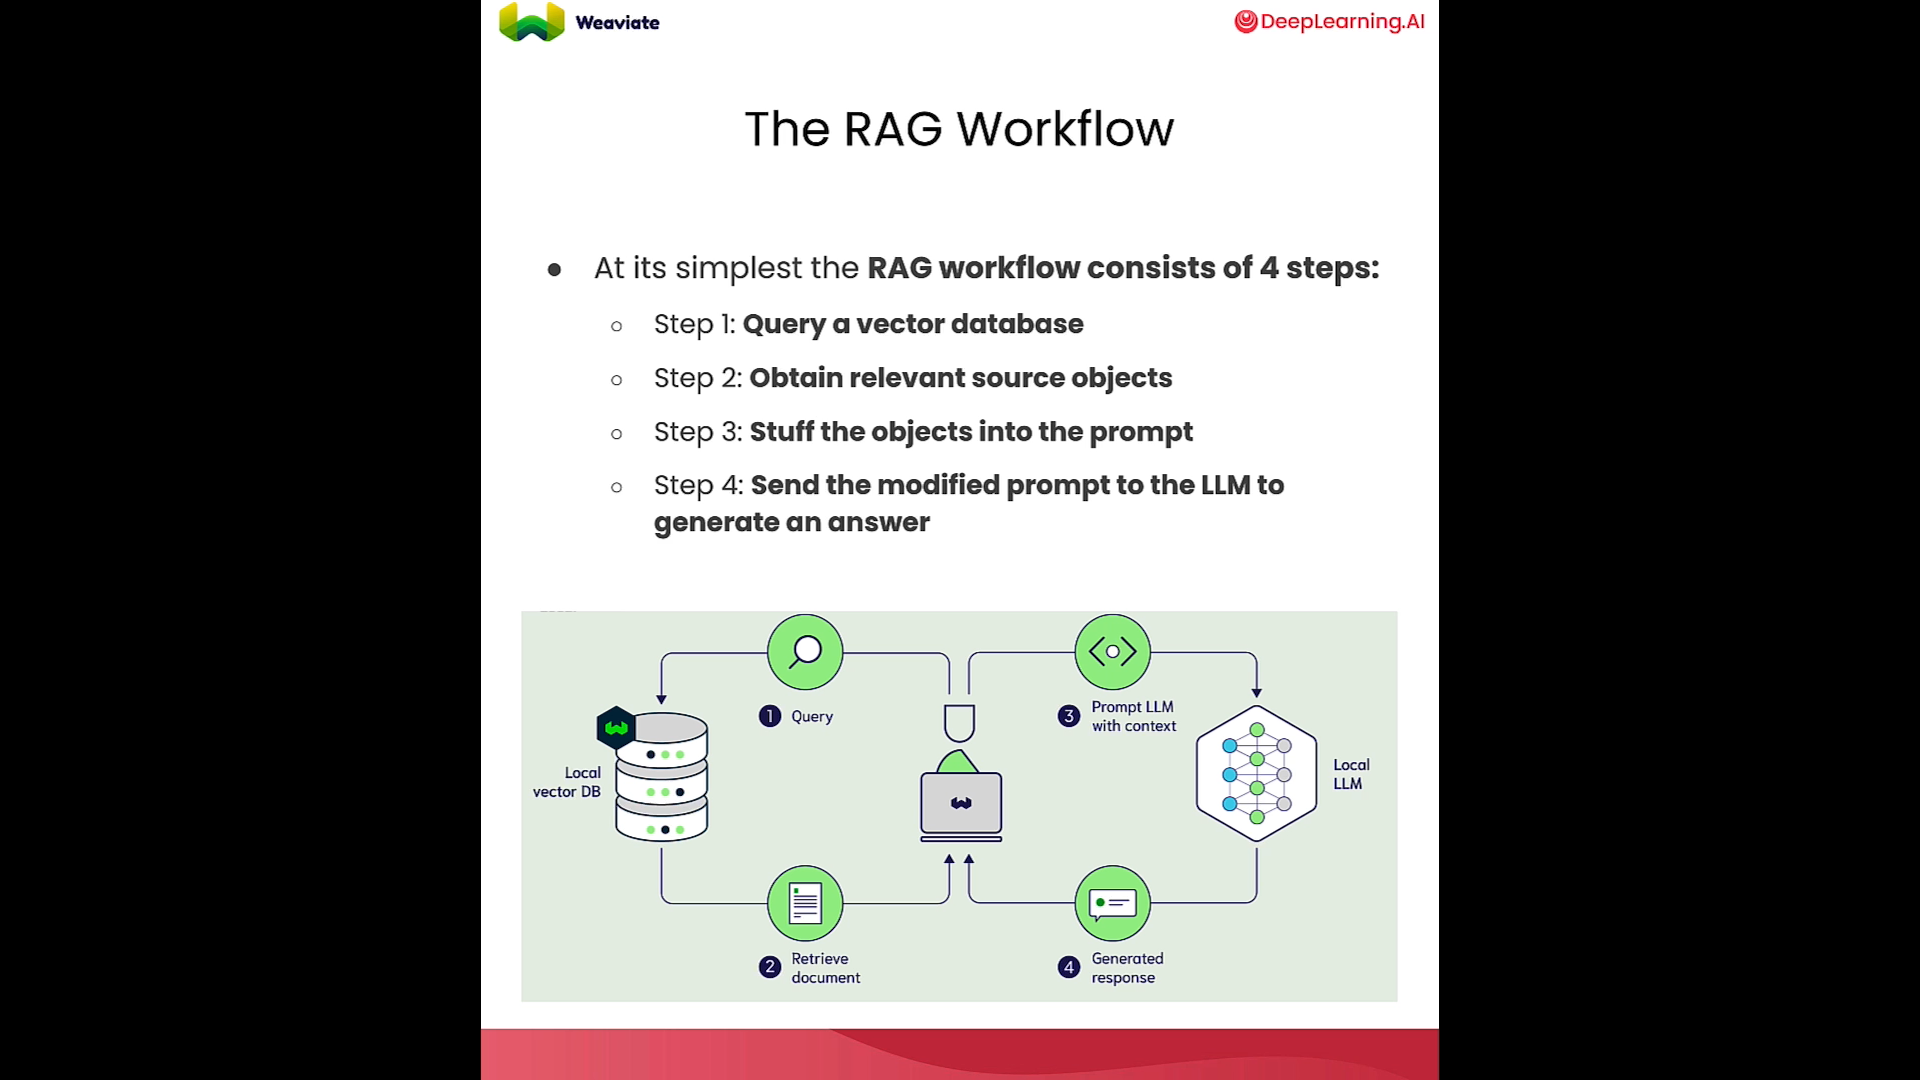

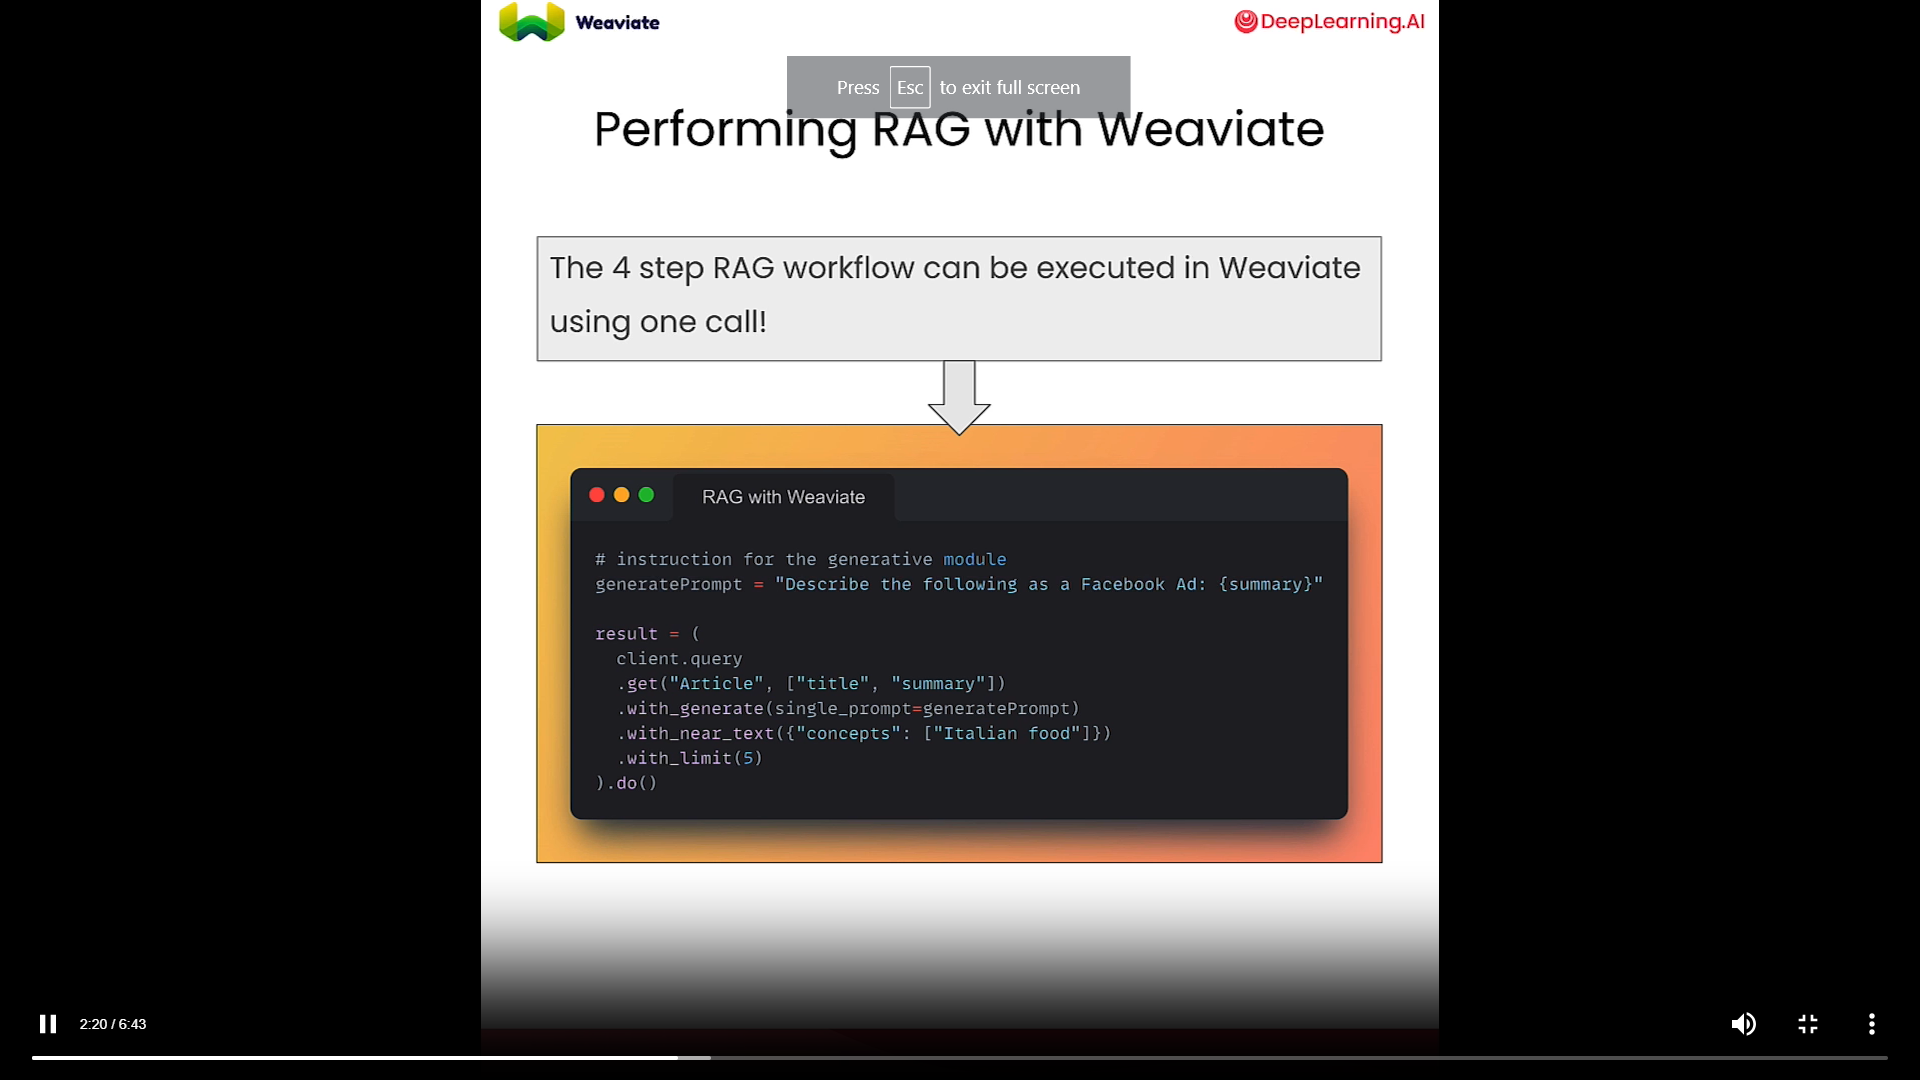

In [1]:
def json_print(data):
    print(json.dumps(data, indent=2))

In [2]:
import weaviate, os, json
import openai
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

auth_config = weaviate.auth.AuthApiKey(api_key=os.getenv("WEAVIATE_API_KEY"))

client = weaviate.Client(
    url=os.getenv("WEAVIATE_API_URL"),
    auth_client_secret=auth_config,
    additional_headers={
        "X-Cohere-Api-Key": os.getenv("COHERE_API_KEY"),
        "X-Cohere-BaseURL": os.getenv("CO_API_URL")
    }
)

client.is_ready() #check if True

True

### 2. How many vectors are stored in this database

In [9]:
print(json.dumps(client.query.aggregate("Wikipedia").with_meta_count().do(), indent=2))

{
  "data": {
    "Aggregate": {
      "Wikipedia": [
        {
          "meta": {
            "count": 4306800
          }
        }
      ]
    }
  }
}


### 3. Perform search over them to find concepts you are interested in!

In [11]:
response = (client.query
            .get("Wikipedia",['text','title','url','views','lang'])
            .with_near_text({"concepts": "Vacation spots in california"})
            .with_limit(5)
            .do()
           )

json_print(response)

{
  "data": {
    "Get": {
      "Wikipedia": [
        {
          "lang": "en",
          "text": "Many locals and tourists frequent the Southern California coast for its beaches. Some of southern California's most popular beaches are Malibu, Laguna Beach, La Jolla, Manhattan Beach, and Hermosa Beach. Southern California is also known for its mountain resort communities, such as Big Bear Lake, Lake Arrowhead, and Wrightwood, and their ski resorts, like Bear Mountain, Snow Summit, Snow Valley Mountain Resort, and Mountain High. The inland desert city of Palm Springs is also popular.",
          "title": "Southern California",
          "url": "https://en.wikipedia.org/wiki?curid=62520",
          "views": 2000
        },
        {
          "lang": "en",
          "text": "Carbon Beach, Surfrider Beach, Westward Beach, Escondido Beach, Paradise Cove, Point Dume, Pirates Cove, Zuma Beach, Trancas and Encinal Bluffs are places along the coast in Malibu. Point Dume forms the northern end

In [5]:
response = (client.query
            .get("Wikipedia",['text','title','url','views','lang'])
            .with_near_text({"concepts": "Vacation spots in california"})
            .with_where({
                "path" : ['lang'],
                "operator" : "Equal",
                "valueString":'en'
            })
            .with_limit(3)
            .do()
           )

json_print(response)

{
  "data": {
    "Get": {
      "Wikipedia": [
        {
          "lang": "en",
          "text": "Many locals and tourists frequent the Southern California coast for its beaches. Some of southern California's most popular beaches are Malibu, Laguna Beach, La Jolla, Manhattan Beach, and Hermosa Beach. Southern California is also known for its mountain resort communities, such as Big Bear Lake, Lake Arrowhead, and Wrightwood, and their ski resorts, like Bear Mountain, Snow Summit, Snow Valley Mountain Resort, and Mountain High. The inland desert city of Palm Springs is also popular.",
          "title": "Southern California",
          "url": "https://en.wikipedia.org/wiki?curid=62520",
          "views": 2000
        },
        {
          "lang": "en",
          "text": "Carbon Beach, Surfrider Beach, Westward Beach, Escondido Beach, Paradise Cove, Point Dume, Pirates Cove, Zuma Beach, Trancas and Encinal Bluffs are places along the coast in Malibu. Point Dume forms the northern end

In [12]:
response = (client.query
            .get("Wikipedia",['text','title','url','views','lang'])
            .with_near_text({"concepts": "Miejsca na wakacje w Kalifornii"})
            .with_where({
                "path" : ['lang'],
                "operator" : "Equal",
                "valueString":'en'
            })
            .with_limit(3)
            .do()
           )

json_print(response)

{
  "data": {
    "Get": {
      "Wikipedia": [
        {
          "lang": "en",
          "text": "Many locals and tourists frequent the Southern California coast for its beaches. Some of southern California's most popular beaches are Malibu, Laguna Beach, La Jolla, Manhattan Beach, and Hermosa Beach. Southern California is also known for its mountain resort communities, such as Big Bear Lake, Lake Arrowhead, and Wrightwood, and their ski resorts, like Bear Mountain, Snow Summit, Snow Valley Mountain Resort, and Mountain High. The inland desert city of Palm Springs is also popular.",
          "title": "Southern California",
          "url": "https://en.wikipedia.org/wiki?curid=62520",
          "views": 2000
        },
        {
          "lang": "en",
          "text": "Malibu has been used as a location or setting for many films, television programs, fashion shoots and music videos.",
          "title": "Malibu, California",
          "url": "https://en.wikipedia.org/wiki?curid=10

In [13]:
response = (client.query
            .get("Wikipedia",['text','title','url','views','lang'])
            .with_near_text({"concepts": "أماكن العطلات في كاليفورنيا"})
            .with_where({
                "path" : ['lang'],
                "operator" : "Equal",
                "valueString":'en'
            })
            .with_limit(3)
            .do()
           )

json_print(response)

{
  "data": {
    "Get": {
      "Wikipedia": [
        {
          "lang": "en",
          "text": "Many locals and tourists frequent the Southern California coast for its beaches. Some of southern California's most popular beaches are Malibu, Laguna Beach, La Jolla, Manhattan Beach, and Hermosa Beach. Southern California is also known for its mountain resort communities, such as Big Bear Lake, Lake Arrowhead, and Wrightwood, and their ski resorts, like Bear Mountain, Snow Summit, Snow Valley Mountain Resort, and Mountain High. The inland desert city of Palm Springs is also popular.",
          "title": "Southern California",
          "url": "https://en.wikipedia.org/wiki?curid=62520",
          "views": 2000
        },
        {
          "lang": "en",
          "text": "The park is located east of Webb Way, and between Civic Center Way on the north and PCH to the south. It was the site of the annual Labor Day Weekend Kiwanis Club Chili Cook-Off from 1982 to 2009 (in 2010, the Chili

## Retrieval Augmented Generation

### Single Prompt

In [14]:
prompt = "Write me a facebook ad about {title} using information inside {text}"
result = (
  client.query
  .get("Wikipedia", ["title","text"])
  .with_generate(single_prompt=prompt)
  .with_near_text({
    "concepts": ["Vacation spots in california"]
  })
  .with_limit(3)
).do()

json_print(result)

{
  "data": {
    "Get": {
      "Wikipedia": [
        {
          "_additional": {
            "generate": {
              "error": null,
              "singleResult": " Are you tired of the cold winter weather? Do you crave fun in the sun? \n\nThen come visit Southern California! \n\nWith gorgeous beaches along the Southern California coast, it's hard to pick just one with so many amazing options, such as Malibu, Laguna Beach, La Jolla, Manhattan Beach, and Hermosa Beach, to name a few. \n\nSouthern California also offers stunning mountain resort communities. You can ski or snowboard at world-class resorts like Bear Mountain, Snow Summit, Snow Valley Mountain Resort, and Mountain High. \n\nOr maybe you'd like to venture into the inland desert. The city of Palm Springs is waiting for you with an abundance of activities and accommodations to enjoy! \n\nCome alone or bring the family. Experience the ultimate outdoor vacation in Southern California. \n\nClick \"Learn More\" now to plan 

### Group Task

In [15]:
generate_prompt = "Summarize what these posts are about in two paragraphs."

result = (
  client.query
  .get("Wikipedia", ["title","text"])
  .with_generate(grouped_task=generate_prompt) # Pass in all objects at once
  .with_near_text({
    "concepts": ["Vacation spots in california"]
  })
  .with_limit(3)
).do()

json_print(result)


{
  "data": {
    "Get": {
      "Wikipedia": [
        {
          "_additional": {
            "generate": {
              "error": null,
              "groupedResult": " The first post highlights the beaches in Southern California, mentioning several famous spots such as Malibu, Laguna Beach, and La Jolla. It also mentions resort communities in the mountains, particularly for skiing, and the desert city of Palm Springs as popular destinations for different types of tourists. \n\nThe second post, in contrast, focuses entirely on different beaches in Malibu, pointing out their specific location along the coast and giving important sites and parks nearby, like the Santa Monica Bay, the Palos Verdes Peninsula, and Santa Catalina Island. \n\nBoth posts emphasize the importance of California's natural landscape to tourists. "
            }
          },
          "text": "Many locals and tourists frequent the Southern California coast for its beaches. Some of southern California's most pop